##Decision Tree Classification

##Importing the Libraries

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##Importing the Dataset

In [118]:
dataset = pd.read_csv('student_scores_science_commercial3.csv')
print(dataset)

     English  Maths  Basic_Science  Business_Studies  English_Literature  \
0         51     89             31                57                  72   
1         92     13              8                85                  23   
2         14     26             98                48                  63   
3         71      8             18                51                  98   
4         60     78             47                41                  48   
..       ...    ...            ...               ...                 ...   
145       46      0             57                88                  46   
146       77     47             62                20                  48   
147        2     11             61                35                  13   
148        0     68             21                 9                  14   
149        4     36             57               100                  30   

     Department  
0           NaN  
1           NaN  
2           NaN  
3           NaN

In [119]:
dataset['Average_Score'] = dataset[['English', 'Maths', 'Basic_Science']].mean(axis=1)
print(dataset['Average_Score'])

0      57.000000
1      37.666667
2      46.000000
3      32.333333
4      61.666667
         ...    
145    34.333333
146    62.000000
147    24.666667
148    29.666667
149    32.333333
Name: Average_Score, Length: 150, dtype: float64


In [120]:
dataset['Department'] = dataset['Average_Score'].apply(lambda x: 'Science' if x >= 50 else 'Commercial')


##Encoding the Categorical Data

In [121]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Department_Code'] = label_encoder.fit_transform(dataset['Department'])

In [122]:
print(dataset['Department_Code'])

0      1
1      0
2      0
3      0
4      1
      ..
145    0
146    1
147    0
148    0
149    0
Name: Department_Code, Length: 150, dtype: int64


##Features and Dependent Variables

In [123]:
X = dataset[['Average_Score']]
y = dataset['Department_Code']

In [124]:
print(X)

     Average_Score
0        57.000000
1        37.666667
2        46.000000
3        32.333333
4        61.666667
..             ...
145      34.333333
146      62.000000
147      24.666667
148      29.666667
149      32.333333

[150 rows x 1 columns]


In [125]:
print(y)

0      1
1      0
2      0
3      0
4      1
      ..
145    0
146    1
147    0
148    0
149    0
Name: Department_Code, Length: 150, dtype: int64


##Splitting the Dataset to Training Set and Test Set

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Decision Tree model on the Training set

In [127]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

##Predicting a new results

In [128]:
predictions = classifier.predict(X_test)

In [129]:
print(classifier.predict([[34.333333]]))


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##Prediciting the Test Results

In [130]:
comparison_dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [131]:
print(comparison_dataset)

     Actual  Predicted
114       0          0
62        1          1
33        0          0
107       0          0
7         0          0
100       0          0
40        1          1
86        1          1
76        0          0
71        0          0
134       1          1
51        0          0
73        0          0
54        0          0
63        1          1
37        1          1
78        0          0
90        1          1
45        1          1
16        1          1
121       0          0
66        0          0
24        1          1
8         1          1
126       0          0
22        0          0
44        1          1
97        1          1
93        0          0
26        1          1
137       1          1
84        1          1
27        0          0
127       1          1
132       0          0
59        0          0
18        0          0
83        1          1


##Making the Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20  0]
 [ 0 18]]


1.0

## Visualising the Training Results

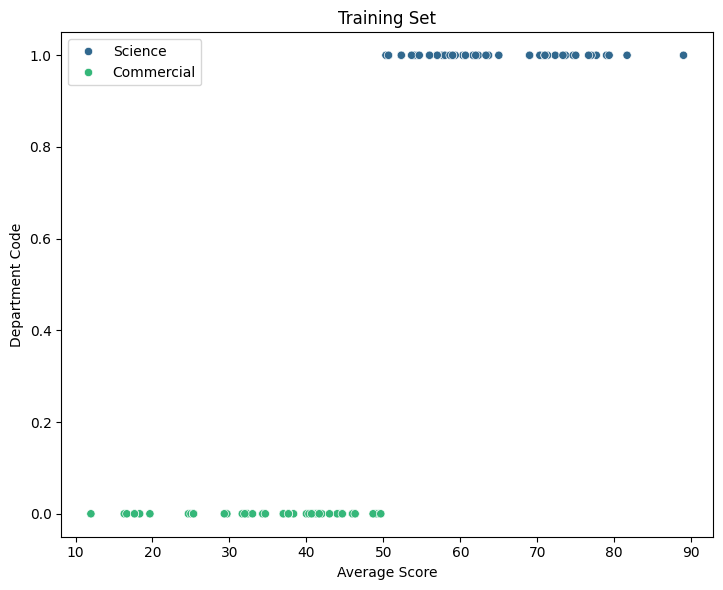

In [133]:
plt.figure(figsize=(14, 6))

# Training set visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train['Average_Score'], y=y_train, hue=label_encoder.inverse_transform(y_train), palette='viridis')
plt.title('Training Set')
plt.xlabel('Average Score')
plt.ylabel('Department Code')

plt.tight_layout()
plt.show()

##Visualising the Test Results

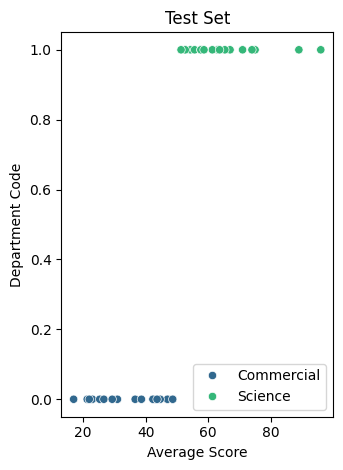

In [134]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['Average_Score'], y=y_test, hue=label_encoder.inverse_transform(y_test), palette='viridis')
plt.title('Test Set')
plt.xlabel('Average Score')
plt.ylabel('Department Code')

plt.tight_layout()
plt.show()